
Loading Intel Image Classification Dataset...
Intel Image Classification Dataset Experiments
n_estimators=1, Test Accuracy=0.3638
n_estimators=10, Test Accuracy=0.4957
n_estimators=50, Test Accuracy=0.5520
n_estimators=100, Test Accuracy=0.5678
n_estimators=300, Test Accuracy=0.5826


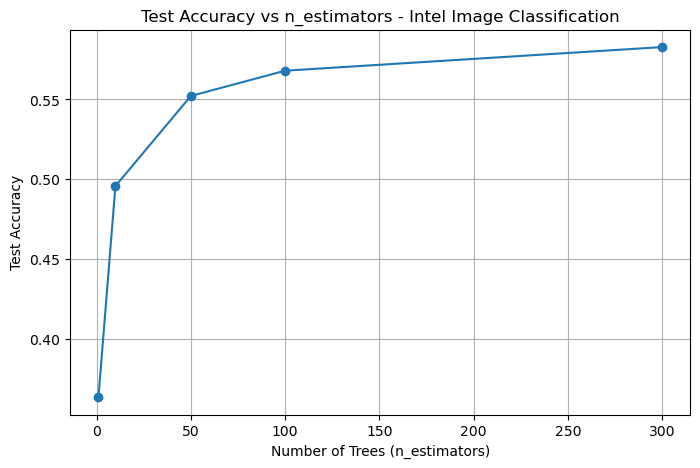


Comparison for Intel Image Classification:
Decision Tree - Test Accuracy: 0.3909, Training Time: 12.1635 seconds
Random Forest - Test Accuracy: 0.5678, Training Time: 14.5689 seconds


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Updated paths based on your provided directory structure
train_path = r'D:\Imsciences\Semester_i\Machine_Learning\Dataset\seg_train\seg_train'
test_path = r'D:\Imsciences\Semester_i\Machine_Learning\Dataset\seg_test\seg_test'

# Function to load images and flatten (with optimizations for memory)
def load_images(path, max_images_per_class=None):
    X = []
    y = []
    labels = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
    for label in labels:
        dir_path = os.path.join(path, label)
        if not os.path.exists(dir_path):
            raise ValueError(f"Directory not found: {dir_path}. Ensure the dataset paths are correct.")
        files = [f for f in os.listdir(dir_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        if max_images_per_class is not None:
            files = files[:max_images_per_class]  # Limit images per class to save memory
        for file in files:
            img_path = os.path.join(dir_path, file)
            img = Image.open(img_path).resize((32, 32))  # Further reduced size to fit in memory
            # Optional: Convert to grayscale to reduce channels (uncomment if needed)
            # img = img.convert('L')
            img_array = np.array(img, dtype=np.float32).flatten() / 255.0  # Use float32 for lower memory
            X.append(img_array)
            y.append(labels[label])
    return np.array(X, dtype=np.float32), np.array(y)  # Ensure overall array is float32

# Load data (train and test are pre-split in dataset)
# Set max_images_per_class to a small number (e.g., 500) if memory still fails; increase if your system allows
print("\nLoading Intel Image Classification Dataset...")
X_train_img, y_train_img = load_images(train_path, max_images_per_class=500)
X_test_img, y_test_img = load_images(test_path, max_images_per_class=500)

# No additional split needed, but can scale if desired (pixels already normalized)

print("Intel Image Classification Dataset Experiments")

# Experiment 1: Vary n_estimators and plot test accuracy
estimators = [1, 10, 50, 100, 300]
accuracies_img = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_img, y_train_img)
    y_pred = rf.predict(X_test_img)
    acc = accuracy_score(y_test_img, y_pred)
    accuracies_img.append(acc)
    print(f"n_estimators={n}, Test Accuracy={acc:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(estimators, accuracies_img, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs n_estimators - Intel Image Classification')
plt.grid(True)
plt.show()

# Experiment 2: Compare Decision Tree vs Random Forest
# Single Decision Tree
dt_img = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt_img.fit(X_train_img, y_train_img)
dt_train_time_img = time.time() - start_time
dt_pred_img = dt_img.predict(X_test_img)
dt_acc_img = accuracy_score(y_test_img, dt_pred_img)

# Random Forest with default parameters
rf_default_img = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_default_img.fit(X_train_img, y_train_img)
rf_train_time_img = time.time() - start_time
rf_pred_img = rf_default_img.predict(X_test_img)
rf_acc_img = accuracy_score(y_test_img, rf_pred_img)

print("\nComparison for Intel Image Classification:")
print(f"Decision Tree - Test Accuracy: {dt_acc_img:.4f}, Training Time: {dt_train_time_img:.4f} seconds")
print(f"Random Forest - Test Accuracy: {rf_acc_img:.4f}, Training Time: {rf_train_time_img:.4f} seconds")